In [12]:
import matplotlib.pyplot as plt
import numpy as np
import csv 
import os
from datetime import datetime


In [13]:
def saving_and_plotting(time, model_lists, ltr_lists, lt_lists, at_lists, atr_lists,params):
    # DO not save the pretrained VGG part
    runs = len(model_lists)
    isQuantum = params['isQuantum']
    exp_name = f'{time}_Quantum:_{isQuantum}'
    directory = f"Exp:_{exp_name}"
    parent_dir = '/global/u2/r/rr637/QPPAI-FL/Results'
    path = os.path.join(parent_dir, directory)
    os.mkdir(path)
    path_plots = path + '/Plots'
    os.mkdir(path_plots)
    path_models = path + '/Models'
    os.mkdir(path_models)
    for i in range(runs):
        plot_acc_loss(atr_lists[i],ltr_lists[i],at_lists[i],lt_lists[i], params['isQuantum'], 
                      exp_name,f'Accuracy/Loss per Round - Iteration {i+1}',i+1)
        torch.save(model_lists[i].net.classifier.state_dict(), f"{path_models}/model_iteration={i}")
    lt_ave = list(np.average(np.array(lt_lists),axis = 0))
    at_ave = list(np.average(np.array(at_lists),axis = 0))
    ltr_ave = list(np.average(np.array(ltr_lists),axis = 0))
    atr_ave = list(np.average(np.array(atr_lists),axis = 0))
    if runs>1:
        plot_acc_loss(atr_ave,ltr_ave,at_ave,lt_ave,params['isQuantum'],exp_name,
                      f'Averaged Accuracy/Loss per Round After {runs} Iterations',0)
    
  
        

# Save lists as CSV files
    with open(path + "/avg_loss_test.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(lt_ave)

    with open(path + "/avg_loss_train.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(ltr_ave)

    with open(path + "/avg_acc_test.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(at_ave)

    with open(path + "/avg_acc_train.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(atr_ave)

    # Save the dictionary as a CSV file
    with open(path + "/params.csv", "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        for key, value in params.items():
            writer.writerow([key, value])
    plt.close()


    return


In [14]:
# def plot_acc_loss(t_a,tr_a,t_l,tr_l, title):
#     plt.plot(tr_a,label = "train accuracy")
#     plt.plot(tr_l,label = "train loss")
#     plt.plot(t_a,label = "test accuracy")
#     plt.plot(t_l,label = "test loss")
#     plt.xlabel('Round')
#     plt.ylabel('Accuracy/Loss')
#     plt.title(title)
#     plt.legend()
#     plt.show()            

def plot_acc_loss(t_a1,tr_a1,t_l1,tr_l1, title1,t_a2,tr_a2,t_l2,tr_l2, title2,t_a3,tr_a3,t_l3,tr_l3, title3,t_a4,tr_a4,t_l4,tr_l4, title4):
    exp_index = datetime.now().strftime("%m_%d_%H_%M_%S")
    fig, axes = plt.subplots(nrows=2, ncols=2)

    # Plot data on each subplot
    axes[0, 0].plot(t_a1,label = "test accuracy")
    axes[0, 0].plot(tr_a1,label = "train accuracy")
    axes[0, 0].plot(tr_l1,label = "train loss")
    axes[0, 0].plot(t_l1,label = "test loss")
    axes[0, 0].set_title(title1, fontweight = 'bold')
    axes[0, 0].legend(loc='lower right', prop={'size': 7})
    


    axes[0, 1].plot(t_a2,label = "test accuracy")
    axes[0, 1].plot(tr_a2,label = "train accuracy")
    axes[0, 1].plot(tr_l2,label = "train loss")
    axes[0, 1].plot(t_l2,label = "test loss")
    axes[0, 1].set_title(title2, fontweight = 'bold')
    axes[0, 1].legend(loc='lower right', prop={'size': 7})

    axes[1, 0].plot(t_a3,label = "test accuracy")
    axes[1, 0].plot(tr_a3,label = "train accuracy")
    axes[1, 0].plot(tr_l3,label = "train loss")
    axes[1, 0].plot(t_l3,label = "test loss")
    axes[1, 0].set_title(title3, fontweight = 'bold')
    axes[1, 0].legend(loc='lower right', prop={'size': 7})

    axes[1, 1].plot(t_a4,label = "test accuracy")
    axes[1, 1].plot(tr_a4,label = "train accuracy")
    axes[1, 1].plot(tr_l4,label = "train loss")
    axes[1, 1].plot(t_l4,label = "test loss")
    axes[1, 1].set_title(title4, fontweight = 'bold')
    axes[1, 1].legend(loc='lower right', prop={'size': 7})


  
    for ax in axes.flat:
        ax.set(xlabel='Rounds', ylabel='Accuracy/Loss')
        ax.set_ylim(0.0,1.0)
        ax.set_xlim(0,20)

    
    for ax in axes.flat:
        ax.label_outer()
    
    # plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')


    plt.tight_layout()
#     plt.savefig(f"Plots/{exp_index}.pdf")

    plt.show()
   

    


In [27]:
def plot_acc_loss2(t_a1,tr_a1,t_l1,tr_l1, title1,t_a2,tr_a2,t_l2,tr_l2, title2,t_a3,tr_a3,t_l3,tr_l3, title3):
    exp_index = datetime.now().strftime("%m_%d_%H_%M_%S")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), gridspec_kw={'width_ratios': [2, 2, 2]})
    axes[0].plot(t_a1,label = "test accuracy")
    axes[0].plot(tr_a1,label = "train accuracy")
    axes[0].plot(tr_l1,label = "train loss")
    axes[0].plot(t_l1,label = "test loss")
    axes[0].set_title(title1, fontsize=15, fontweight='bold')
    axes[0].legend(loc='lower right', prop={'size': 8})
    


    axes[1].plot(t_a2,label = "test accuracy")
    axes[1].plot(tr_a2,label = "train accuracy")
    axes[1].plot(tr_l2,label = "train loss")
    axes[1].plot(t_l2,label = "test loss")
    axes[1].set_title(title2, fontsize=15, fontweight='bold')
    axes[1].legend(loc='lower right', prop={'size': 8})

    axes[2].plot(t_a3,label = "test accuracy")
    axes[2].plot(tr_a3,label = "train accuracy")
    axes[2].plot(tr_l3,label = "train loss")
    axes[2].plot(t_l3,label = "test loss")
    axes[2].set_title(title3, fontsize=15, fontweight='bold')
    axes[
        2].legend(loc='lower right', prop={'size': 8})
    
    for ax in axes.flat:
        ax.set_xlabel('Rounds', fontsize=14)
        ax.set_ylabel('Accuracy/Loss', fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=14)  # Set tick label font size
        ax.set_ylim(0.2, 1.0)
        ax.set_xlim(0, 20)
    
    for ax in axes.flat:
        ax.label_outer()
    


    plt.tight_layout()
    plt.savefig(f"/Users/rodrofougaran/Desktop/QFL-DP-Data/Plots/{exp_index}.pdf")
    plt.show()


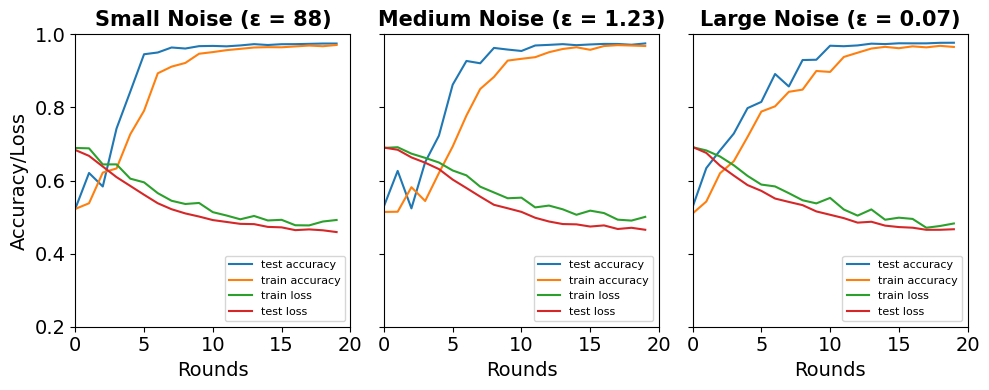

In [28]:
ns_acc_te = []
ns_acc_tr = []
ns_loss_te = []
ns_loss_tr = []
nm_acc_te = []
nm_acc_tr = []
nm_loss_te = []
nm_loss_tr = []
nl_acc_te = []
nl_acc_tr = []
nl_loss_te = []
nl_loss_tr = []

parent_dir = '/Users/rodrofougaran/Desktop/QFL-DP-Data'
ns_path = os.path.join(parent_dir, 'Final_noise_0.15')
nm_path = os.path.join(parent_dir, 'Final_noise_1.0')
nl_path = os.path.join(parent_dir, 'Final_noise_4.0')
test_acc = 'avg_acc_test.csv'
test_loss = 'avg_loss_test.csv'
tr_acc = 'avg_acc_train.csv'
tr_loss = 'avg_loss_train.csv'

with open(os.path.join(ns_path,test_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    ns_acc_te = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(nm_path,test_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    nm_acc_te = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(nl_path,test_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    nl_acc_te = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(ns_path,test_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    ns_loss_te = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(nm_path,test_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    nm_loss_te = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(nl_path,test_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    nl_loss_te = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(ns_path,tr_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    ns_acc_tr = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(nm_path,tr_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    nm_acc_tr = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(nl_path,tr_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    nl_acc_tr = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(ns_path,tr_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    ns_loss_tr = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(nm_path,tr_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    nm_loss_tr = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(nl_path,tr_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    nl_loss_tr = [float(value) for value in list(csv_reader)[0]]
    
ns_title = "Small Noise (\u03B5 = 88)"
nm_title = "Medium Noise (\u03B5 = 1.23)"
nl_title = "Large Noise (\u03B5 = 0.07)"

plot_acc_loss2(ns_acc_te, ns_acc_tr, ns_loss_te, ns_loss_tr, ns_title, nm_acc_te, nm_acc_tr, nm_loss_te, nm_loss_tr, nm_title, nl_acc_te, nl_acc_tr,nl_loss_te,nl_loss_tr, nl_title)


In [ ]:
DP_1_acc_te = []
DP_1_acc_tr = []
DP_1_loss_te = []
DP_1_loss_tr = []
DP_2_acc_te = []
DP_2_acc_tr = []
DP_2_loss_te = []
DP_2_loss_tr = []
DP_4_acc_te = []
DP_4_acc_tr = []
DP_4_loss_te = []
DP_4_loss_tr = []
NonDP_1_acc_te = []
NonDP_1_acc_tr = []
NonDP_1_loss_te = []
NonDP_1_loss_tr = []


parent_dir = '/Users/rodrofougaran/Desktop/QFL-DP-Data'
DP_1_path = os.path.join(parent_dir, 'Quantum-DP_Final_1_Epoch')
DP_2_path = os.path.join(parent_dir, 'Quantum-DP_Final_2_Epoch')
DP_4_path = os.path.join(parent_dir, 'Quantum-DP_Final_4_Epochs')
NonDP_1_path = os.path.join(parent_dir, 'Quantum-NonDp_Final_1_Epoch')
test_acc = 'avg_acc_test.csv'
test_loss = 'avg_loss_test.csv'
tr_acc = 'avg_acc_train.csv'
tr_loss = 'avg_loss_train.csv'

with open(os.path.join(DP_1_path,test_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_1_acc_te = [float(value) for value in list(csv_reader)[0]][0:20]
    

with open(os.path.join(DP_2_path,test_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_2_acc_te = [float(value) for value in list(csv_reader)[0]]

with open(os.path.join(DP_4_path,test_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_4_acc_te = [float(value) for value in list(csv_reader)[0]]

with open(os.path.join(NonDP_1_path,test_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    NonDP_1_acc_te = [float(value) for value in list(csv_reader)[0]]

with open(os.path.join(DP_1_path,test_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_1_loss_te = [float(value) for value in list(csv_reader)[0]][0:20]

with open(os.path.join(DP_2_path,test_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_2_loss_te = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(DP_4_path,test_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_4_loss_te = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(NonDP_1_path,test_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    NonDP_1_loss_te = [float(value) for value in list(csv_reader)[0]]

with open(os.path.join(DP_1_path,tr_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_1_acc_tr = [float(value) for value in list(csv_reader)[0]][0:20]

with open(os.path.join(DP_2_path,tr_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_2_acc_tr = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(DP_4_path,tr_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_4_acc_tr = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(NonDP_1_path,tr_acc), mode='r') as file:
    csv_reader = csv.reader(file)
    NonDP_1_acc_tr = [float(value) for value in list(csv_reader)[0]]
with open(os.path.join(DP_1_path,tr_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_1_loss_tr = [float(value) for value in list(csv_reader)[0]][0:20]
with open(os.path.join(DP_2_path,tr_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_2_loss_tr = [float(value) for value in list(csv_reader)[0]]

with open(os.path.join(DP_4_path,tr_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    DP_4_loss_tr = [float(value) for value in list(csv_reader)[0]]

with open(os.path.join(NonDP_1_path,tr_loss), mode='r') as file:
    csv_reader = csv.reader(file)
    NonDP_1_loss_tr = [float(value) for value in list(csv_reader)[0]]


DP_1_title = 'DP - 1 Local Epoch'
DP_2_title = 'DP - 2 Local Epochs'
DP_4_title = 'DP - 4 Local Epochs'
NonDP_1_title = 'Non-DP - 1 Local Epoch'


plot_acc_loss(DP_1_acc_te, DP_1_acc_tr, DP_1_loss_te,DP_1_loss_tr, DP_1_title, DP_2_acc_te, DP_2_acc_tr, DP_2_loss_te,DP_2_loss_tr, DP_2_title, DP_4_acc_te, DP_4_acc_tr, DP_4_loss_te,DP_4_loss_tr, DP_4_title, NonDP_1_acc_te, NonDP_1_acc_tr, NonDP_1_loss_te, NonDP_1_loss_tr, NonDP_1_title)

